<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_excel('Flight_Fare.xlsx')

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [ ]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data['Duration'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object>

In [ ]:
data.shape

(10683, 11)

In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#EDA
#First will convert object datatype of Date_of_Journey into timestamp to use this to price prediction.
#we use pandas to_datetime to convert object data type to datatime dtype
#dt.day will extract only day of that date
#dt.month extract only the

In [ ]:
data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.day
data['Journey_day']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_day, Length: 10682, dtype: int64

In [ ]:
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.month
data['Journey_month']

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Journey_month, Length: 10682, dtype: int64

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
# since we have created two columns which contains date and month , we drop Date_Of_Journey column
data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
# similary will extract values from Dep_Time
# will extract hours and minutes and will represent in different columns
#Extracting hours
data['Dept_hour']=pd.to_datetime(data.Dep_Time).dt.hour
#extracting minutes
data['Dept_minute']=pd.to_datetime(data.Dep_Time).dt.minute
#drop Dep_Time column
data.drop(['Dep_Time'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hour,Dept_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
#similarly extract hours and minutes from Arrival_Time
#Extracting hours
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
#extracting minutes
data['Arrival_minute']=pd.to_datetime(data.Arrival_Time).dt.minute
#drop Dep_Time column
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
#Assigning and converting Duration column into list
duration = list(data['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
data['Duration_hours'] = dur_hours
data['Duration_minutes'] =dur_minutes


In [ ]:
data.drop(['Duration'],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
data[['Source']].value_counts()

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

In [ ]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [ ]:
#Handling categorical data
#Nominal data:Data which are not in any order we use One hot Encoder
#ordinal data:Data which is in order we use Label Encoder

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_day,10682.0,13.509081,8.479363,1.0,6.0,12.0,21.0,27.0
Journey_month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
Dept_hour,10682.0,12.491013,5.748820,0.0,8.0,11.0,18.0,23.0
Dept_minute,10682.0,24.409287,18.767801,0.0,5.0,25.0,40.0,55.0
Arrival_hour,10682.0,13.349186,6.859317,0.0,8.0,14.0,19.0,23.0
Arrival_minute,10682.0,24.690601,16.506808,0.0,10.0,25.0,35.0,55.0
Duration_hours,10682.0,10.244898,8.494916,0.0,2.0,8.0,15.0,47.0
Duration_minutes,10682.0,28.326624,16.945817,0.0,15.0,30.0,45.0,55.0


In [ ]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

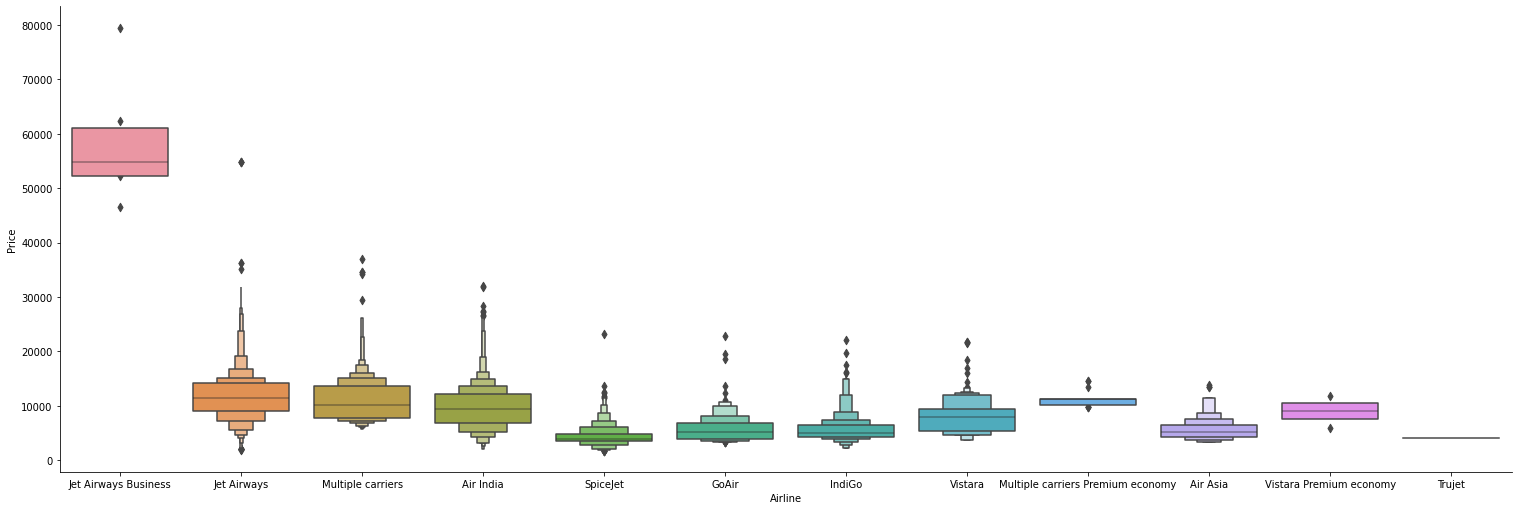

In [ ]:
sns.catplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False),kind='boxen',height=7,aspect=3)
plt.show()

In [ ]:
#As Airline is Nominal categorical data will perform one hot encoding
Airline=data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
data[['Source']].value_counts()

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

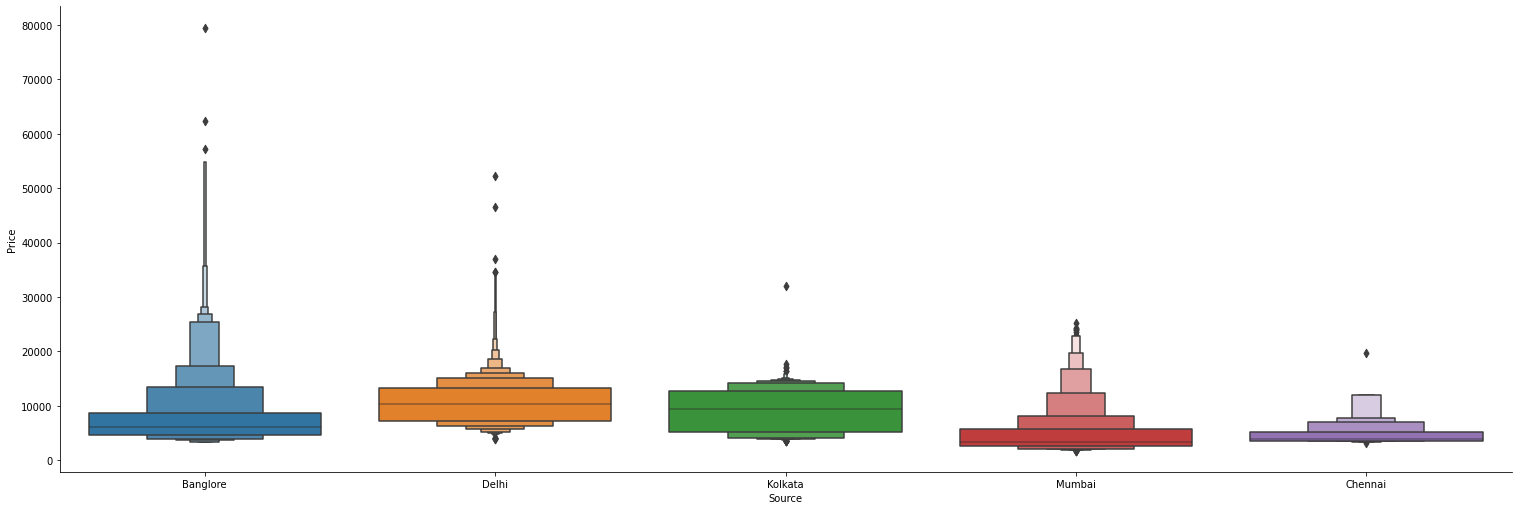

In [ ]:
sns.catplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False),kind='boxen',height=7,aspect=3)
plt.show()

In [ ]:
source=data[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
data[['Destination']].value_counts()

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64

In [ ]:
destination=data[['Destination']]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [ ]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0


In [ ]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [ ]:
data.head(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
new_data=pd.concat([data,Airline,source,destination],axis=1)

In [ ]:
new_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
new_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
new_data.shape

(10682, 30)

In [ ]:
new_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dept_hour',
       'Dept_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Stops,10682.0,0.824190,0.675229,0.0,0.0,1.0,1.0,4.0
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_day,10682.0,13.509081,8.479363,1.0,6.0,12.0,21.0,27.0
Journey_month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
Dept_hour,10682.0,12.491013,5.748820,0.0,8.0,11.0,18.0,23.0
Dept_minute,10682.0,24.409287,18.767801,0.0,5.0,25.0,40.0,55.0
Arrival_hour,10682.0,13.349186,6.859317,0.0,8.0,14.0,19.0,23.0
Arrival_minute,10682.0,24.690601,16.506808,0.0,10.0,25.0,35.0,55.0
Duration_hours,10682.0,10.244898,8.494916,0.0,2.0,8.0,15.0,47.0
Duration_minutes,10682.0,28.326624,16.945817,0.0,15.0,30.0,45.0,55.0


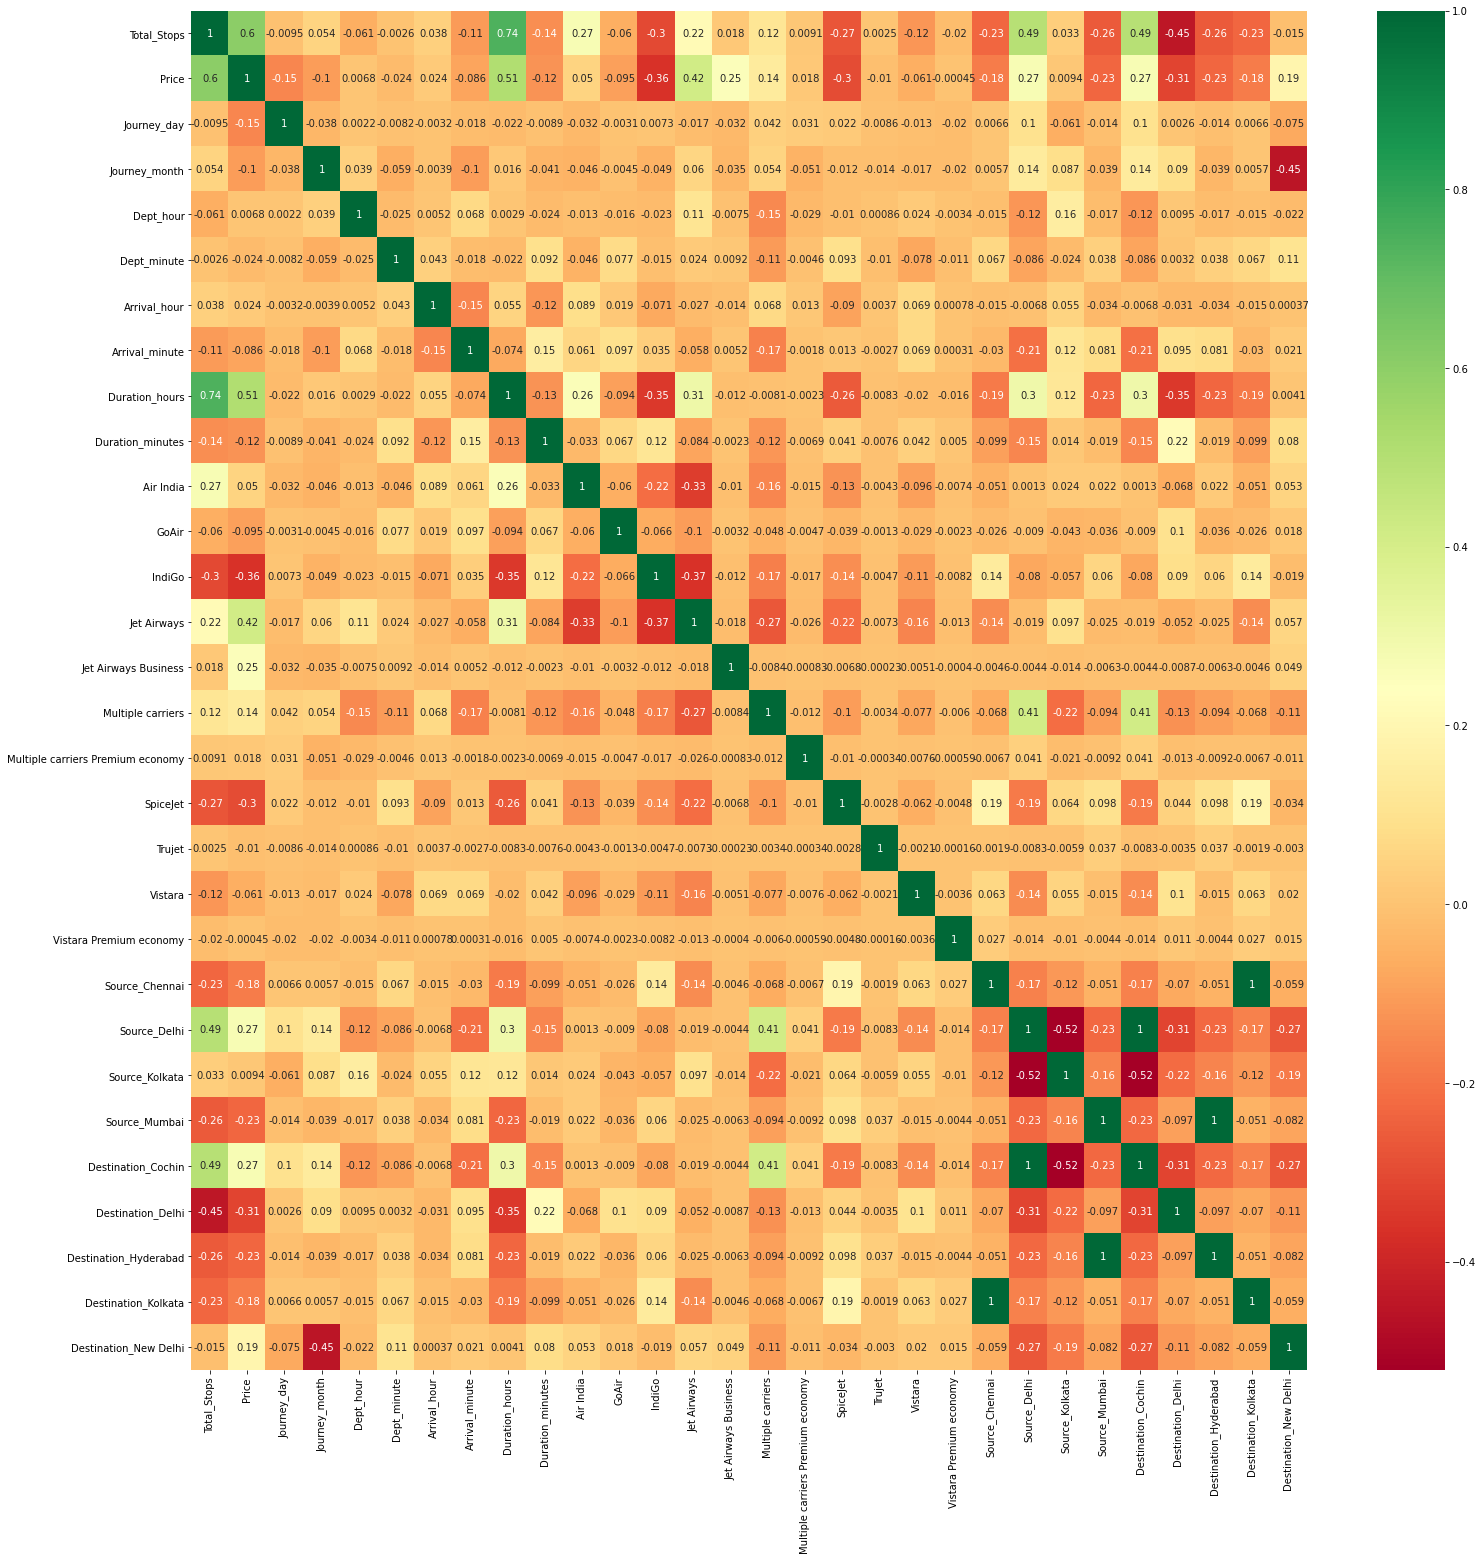

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
new_data.shape

(10682, 30)

In [ ]:
new_data.isnull().sum()

Total_Stops                          0
Price                                0
Journey_day                          0
Journey_month                        0
Dept_hour                            0
Dept_minute                          0
Arrival_hour                         0
Arrival_minute                       0
Duration_hours                       0
Duration_minutes                     0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin       

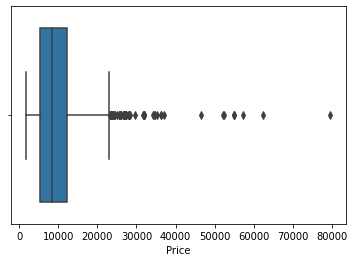

In [ ]:
sns.boxplot(new_data.Price)

In [ ]:
df1=new_data.Price
Q25=df1.quantile(0.25)
Q75=df1.quantile(0.75)
IQR=Q75-Q25
min_limit=Q25-1.5*IQR
max_limit=Q75+1.5*IQR
outliers1=[x for x in df1 if x < min_limit or x > max_limit]
#median=np.median(new_data["Price"])
for i in new_data['Price']:
  if i>max_limit or i<min_limit:
    new_data['Price']=new_data['Price'].replace(i,max_limit)

In [ ]:
new_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dept_hour',
       'Dept_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
#split data
X_1=new_data.drop(['Price'],axis=1)
Y_1=new_data['Price']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X_1,Y_1)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)

[2.52471574e-01 1.11748403e-01 7.10870595e-02 2.30936850e-02
 2.15278988e-02 2.21483435e-02 1.85450727e-02 1.33066884e-01
 1.56009499e-02 1.38031216e-02 2.25261204e-03 1.63311809e-02
 1.61645978e-01 4.59391242e-03 2.39642668e-02 1.03602846e-03
 3.10606221e-03 1.15199309e-04 5.83514308e-03 9.86656801e-05
 5.54048017e-04 1.50250444e-02 9.74839533e-03 6.33862136e-03
 1.67324962e-02 2.32610254e-02 8.79598143e-03 7.25865689e-04
 1.67464814e-02]


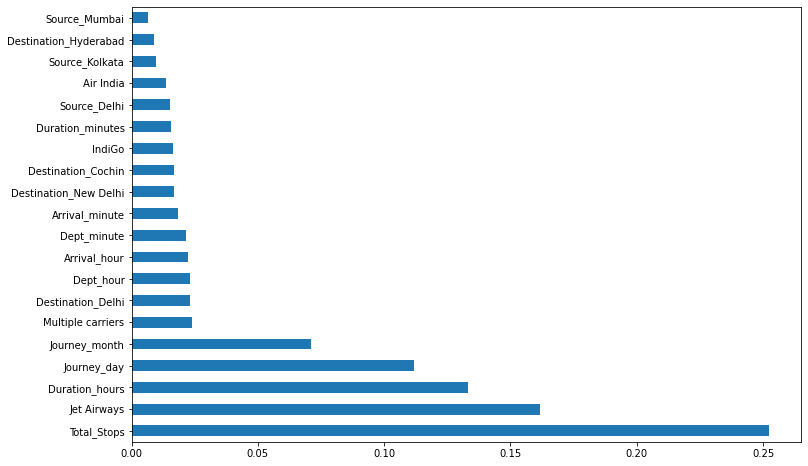

In [ ]:
plt.figure(figsize=(12,8))
fea_importances=pd.Series(selection.feature_importances_,index=X_1.columns)
fea_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
new_data.shape

(10682, 30)

In [ ]:
#from sklearn.preprocessing  import StandardScaler
model=StandardScaler()
print(model.fit(X_1))
x_transform=model.transform(X_1)
print(x_transform)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.22066609  1.23728754 -1.46740227 ... -0.2642058  -0.19231927
   3.23440464]
 [ 1.74143186 -1.47530729  0.25028893 ... -0.2642058  -0.19231927
  -0.30917591]
 [ 1.74143186 -0.53179604  1.10913453 ... -0.2642058  -0.19231927
  -0.30917591]
 ...
 [-1.22066609  1.59110426 -0.60855667 ... -0.2642058  -0.19231927
  -0.30917591]
 [-1.22066609 -1.47530729 -1.46740227 ... -0.2642058  -0.19231927
   3.23440464]
 [ 1.74143186 -0.53179604  0.25028893 ... -0.2642058  -0.19231927
  -0.30917591]]


In [ ]:
#scaled_x_fea=pd.DataFrame(x_transform, columns = X_1.columns)
scaled_x_fea.head()

,Total_Stops,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220666,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
1,1.741432,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319,2.258432,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
2,1.741432,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678,-0.442785,-0.136005,-0.487769,1.332391,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.366513,-0.264206,-0.192319,-0.309176
3,0.260383,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
4,0.260383,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405


In [ ]:
##Log Transformation to the target variable
log_transform_y=np.log(Y_1)
log_transform_y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [ ]:
#X=scaled_x_fea
Y=log_transform_y

In [ ]:
X

,Total_Stops,Journey_day,Journey_month,Dept_hour,Dept_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220666,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
1,1.741432,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319,2.258432,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
2,1.741432,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678,-0.442785,-0.136005,-0.487769,1.332391,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.366513,-0.264206,-0.192319,-0.309176
3,0.260383,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
4,0.260383,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.220666,-0.531796,-0.608557,1.132283,1.630034,1.261236,0.018745,-0.970614,0.098753,-0.442785,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
10678,-1.220666,1.591104,-0.608557,1.306240,1.097181,1.407030,-0.284175,-0.970614,0.393825,2.258432,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
10679,-1.220666,1.591104,-0.608557,-0.781243,-0.234950,-0.342497,-0.284175,-0.852891,-1.671678,-0.442785,-0.136005,-0.487769,1.332391,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,2.728419,-0.264206,-0.192319,-0.309176
10680,-1.220666,-1.475307,-1.467402,-0.259372,0.297903,0.094885,-0.890014,-0.970614,0.688897,-0.442785,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,4.615260,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405


In [ ]:
X=X_1
Y=Y_1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                    test_size=0.2,random_state=200)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 29), (2137, 29), (8545,), (2137,))

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
#fit the model and predict values
linear.fit(X_train, y_train)
y_predict = linear.predict(X_test)
#print(y_predict)
#Print the intercept and coefficient of x_features
print('The intercept is {}'.format(linear.intercept_))
pd.DataFrame(linear.coef_,X_1.columns,columns=['Coefficient'])

The intercept is 6959.023165884336


,Coefficient
Total_Stops,2706.715648
Journey_day,-68.417403
Journey_month,-363.501849
Dept_hour,20.064850
Dept_minute,-1.615477
Arrival_hour,-8.891055
Arrival_minute,1.217275
Duration_hours,4.505463
Duration_minutes,-0.786589
Air India,1597.717030


In [ ]:
#Evaluating the linear model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,y_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,y_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))


MSE:6631974.36799404
MAE:1877.3972992840597
RMSE:2575.261999873807


In [ ]:
#Evalaute the model using r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
print(r2_score)

0.6445255639609936


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predict = rf.predict(X_test)

In [ ]:
#Evalaute the model using r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
print(r2_score)

0.8367617748536962


In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_predict = xgb.predict(X_test)
#Evalaute the model using r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
print(r2_score)

[10:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7878509876920528


In [ ]:
#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1500,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [ ]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1118, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=1372, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1372, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.8s
[CV] n_estimators=1372, min_samples_split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=20,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=15,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=700, n_jobs=-1,
                    

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 863}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=20,
 max_features='auto',
 min_samples_leaf= 1,
 min_samples_split= 15,
 n_estimators= 700,ccp_alpha=0.0,n_jobs=-1,random_state=20)
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)
#Evalaute the model using r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
print(r2_score)

0.8540841672618398


In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=2500, verbosity=1,booster='gbtree',  random_state=40,)
xgb.fit(X_train,y_train)
y_predict = xgb.predict(X_test)
#Evaluate the model using r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
print(r2_score)

[10:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8572369195909129


In [ ]:
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(X_train,y_train)
y_predict = svm.predict(X_test)
#Evalaute the model using r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
print(r2_score)


0.01712367399432624
